## Project Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

### Key attributes of the database

#### The database includes the following indicators:
•	
•	`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
•	`country_long` (text): longer form of the country designation
•	`name` (text): name or title of the power plant, generally in Romanized form
•	`gppd_idnr` (text): 10 or 12 character identifier for the power plant
•	`capacity_mw` (number): electrical generating capacity in megawatts
•	`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
•	`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
•	`primary_fuel` (text): energy source used in primary electricity generation or export
•	`other_fuel1` (text): energy source used in electricity generation or export
•	`other_fuel2` (text): energy source used in electricity generation or export
•	`other_fuel3` (text): energy source used in electricity generation or export
•	 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
•	`owner` (text): majority shareholder of the power plant, generally in Romanized form
•	`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
•	`url` (text): web document corresponding to the `source` field
•	`geolocation_source` (text): attribution for geolocation information
•	`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
•	`year_of_capacity_data` (number): year the capacity information was reported
•	`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
•	`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
•	`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
•	`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
•	`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
•	`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
•	`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
•	`generation_data_source` (text): attribution for the reported generation information
•	`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
•	`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
•	`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
•	`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
•	`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
•	'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
•	`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
•	`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
•	`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
•	`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

#### Fuel Type Aggregation

We define the "Fuel Type" attribute of our database based on common fuel categories. 
Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [3]:
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Exploratory data analasys (EDA)

In [4]:
df.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

In [5]:
# we check the dimension of the dataset using .shape matter. 
df.shape

(907, 27)

In [6]:
# we can check the columns names and put them into a list using to_list() matter

df.columns.to_list()

['country',
 'country_long',
 'name',
 'gppd_idnr',
 'capacity_mw',
 'latitude',
 'longitude',
 'primary_fuel',
 'other_fuel1',
 'other_fuel2',
 'other_fuel3',
 'commissioning_year',
 'owner',
 'source',
 'url',
 'geolocation_source',
 'wepp_id',
 'year_of_capacity_data',
 'generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018',
 'generation_gwh_2019',
 'generation_data_source',
 'estimated_generation_gwh']

In [7]:
# we check the data type in our dataset using .dtypes matter. 

df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [8]:
# we check for the null values in columns using .isnull.sum() matter. 

df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [9]:
# checking the null values and getting more info using .info() matter. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

I will drop all the columns that have more than 80% of the data as null values. And rethink the strategy after that. 

In [10]:
df.drop(['other_fuel1','other_fuel2','other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2014','generation_gwh_2019','estimated_generation_gwh'], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 907 non-null    object 
 1   country_long            907 non-null    object 
 2   name                    907 non-null    object 
 3   gppd_idnr               907 non-null    object 
 4   capacity_mw             907 non-null    float64
 5   latitude                861 non-null    float64
 6   longitude               861 non-null    float64
 7   primary_fuel            907 non-null    object 
 8   commissioning_year      527 non-null    float64
 9   owner                   342 non-null    object 
 10  source                  907 non-null    object 
 11  url                     907 non-null    object 
 12  geolocation_source      888 non-null    object 
 13  year_of_capacity_data   519 non-null    float64
 14  generation_gwh_2015     422 non-null    fl

In [11]:
#I also droped all the columns that I din't find esential for our analasys. 

df.drop(['generation_data_source','url','owner','geolocation_source','latitude','longitude','country','country_long'], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   907 non-null    object 
 1   gppd_idnr              907 non-null    object 
 2   capacity_mw            907 non-null    float64
 3   primary_fuel           907 non-null    object 
 4   commissioning_year     527 non-null    float64
 5   source                 907 non-null    object 
 6   year_of_capacity_data  519 non-null    float64
 7   generation_gwh_2015    422 non-null    float64
 8   generation_gwh_2016    434 non-null    float64
 9   generation_gwh_2017    440 non-null    float64
 10  generation_gwh_2018    448 non-null    float64
dtypes: float64(7), object(4)
memory usage: 78.1+ KB


In [12]:
df

,name,gppd_idnr,capacity_mw,primary_fuel,commissioning_year,source,year_of_capacity_data,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,ACME Solar Tower,WRI1020239,2.5,Solar,2011.0,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,Coal,NaN,Ultratech Cement ltd,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,WRI1026669,39.2,Wind,NaN,CDM,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,IND0000001,135.0,Gas,2004.0,Central Electricity Authority,2019.0,843.747000,886.004428,663.774500,626.239128
4,AKALTARA TPP,IND0000002,1800.0,Coal,2015.0,Central Electricity Authority,2019.0,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...
902,YERMARUS TPP,IND0000513,1600.0,Coal,2016.0,Central Electricity Authority,2019.0,0.994875,233.596650,865.400000,686.500000
903,Yelesandra Solar Power Plant,WRI1026222,3.0,Solar,NaN,Karnataka Power Corporation Limited,NaN,NaN,NaN,NaN,NaN
904,Yelisirur wind power project,WRI1026776,25.5,Wind,NaN,CDM,NaN,NaN,NaN,NaN,NaN
905,ZAWAR MINES,WRI1019901,80.0,Coal,NaN,Hindustan Zinc ltd,NaN,NaN,NaN,NaN,NaN


In [13]:
# setting Name as DataFrame index 
df.set_index('name', inplace= True)

# The set_index() function is used to set DataFrame index using existing columns. 

In [14]:
df.columns.tolist()

['gppd_idnr',
 'capacity_mw',
 'primary_fuel',
 'commissioning_year',
 'source',
 'year_of_capacity_data',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018']

In [15]:
# To insert the mean value of each column into its missing rows:
df.fillna(df.mean(numeric_only=True).round(1), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 907 entries, ACME Solar Tower to iEnergy Theni Wind Farm
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gppd_idnr              907 non-null    object 
 1   capacity_mw            907 non-null    float64
 2   primary_fuel           907 non-null    object 
 3   commissioning_year     907 non-null    float64
 4   source                 907 non-null    object 
 5   year_of_capacity_data  907 non-null    float64
 6   generation_gwh_2015    907 non-null    float64
 7   generation_gwh_2016    907 non-null    float64
 8   generation_gwh_2017    907 non-null    float64
 9   generation_gwh_2018    907 non-null    float64
dtypes: float64(7), object(3)
memory usage: 77.9+ KB


In [16]:
main_primary_fuel = df.primary_fuel.value_counts() * 100 / df.primary_fuel.count()
main_primary_fuel

Coal       28.445424
Hydro      27.673649
Solar      14.002205
Wind       13.561191
Gas         7.607497
Biomass     5.512679
Oil         2.205072
Nuclear     0.992282
Name: primary_fuel, dtype: float64

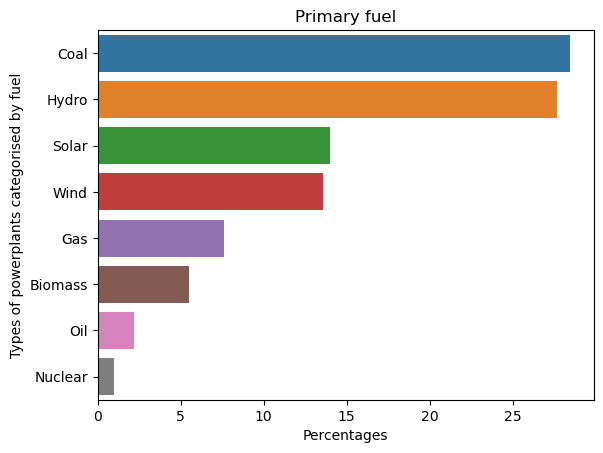

In [17]:
sns.barplot(x = main_primary_fuel, y = main_primary_fuel.index)
plt.title('Primary fuel')
plt.xlabel('Percentages');
plt.ylabel('Types of powerplants categorised by fuel');

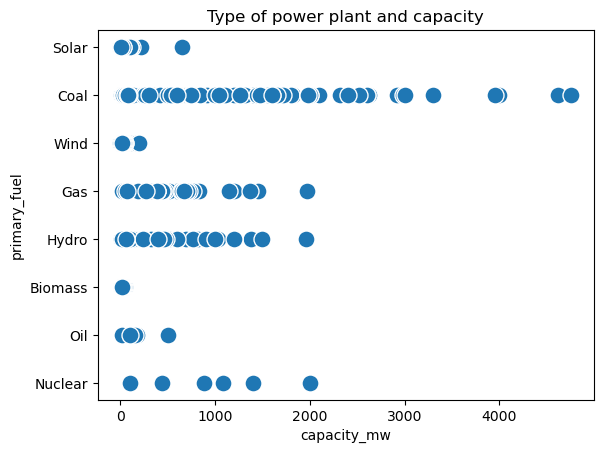

In [18]:
sns.scatterplot(x = df.capacity_mw, y = df.primary_fuel, s = 150)
plt.title('Type of power plant and capacity');

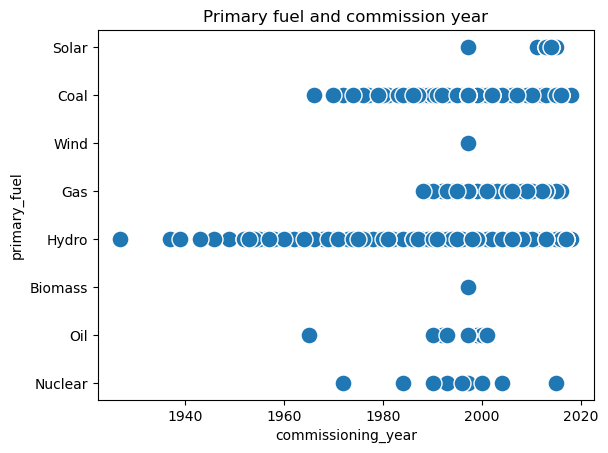

In [19]:
sns.scatterplot(x = df.commissioning_year, y = df.primary_fuel, s = 150);
plt.title('Primary fuel and commission year');

In [20]:
df.describe()

,capacity_mw,commissioning_year,year_of_capacity_data,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.0,907.000000,907.000000,907.000000,907.000000
mean,326.223755,1997.094818,2019.0,2428.212537,2467.917637,2547.780258,2600.802024
std,590.085456,13.016361,0.0,2859.349132,2877.890004,2921.502194,3030.808041
min,0.000000,1927.000000,2019.0,0.000000,0.000000,0.000000,0.000000
25%,16.725000,1997.100000,2019.0,916.000000,896.500214,882.594850,824.842340
50%,59.200000,1997.100000,2019.0,2428.200000,2467.900000,2547.800000,2600.800000
75%,385.250000,2003.000000,2019.0,2428.200000,2467.900000,2547.800000,2600.800000
max,4760.000000,2018.000000,2019.0,30539.000000,30015.000000,35116.000000,35136.000000


In [27]:
# Encoding categorical columns
from sklearn.preprocessing import OrdinalEncoder
OE= OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 907 entries, ACME Solar Tower to iEnergy Theni Wind Farm
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gppd_idnr              907 non-null    float64
 1   capacity_mw            907 non-null    float64
 2   primary_fuel           907 non-null    float64
 3   commissioning_year     907 non-null    float64
 4   source                 907 non-null    float64
 5   year_of_capacity_data  907 non-null    float64
 6   generation_gwh_2015    907 non-null    float64
 7   generation_gwh_2016    907 non-null    float64
 8   generation_gwh_2017    907 non-null    float64
 9   generation_gwh_2018    907 non-null    float64
dtypes: float64(10)
memory usage: 110.2+ KB


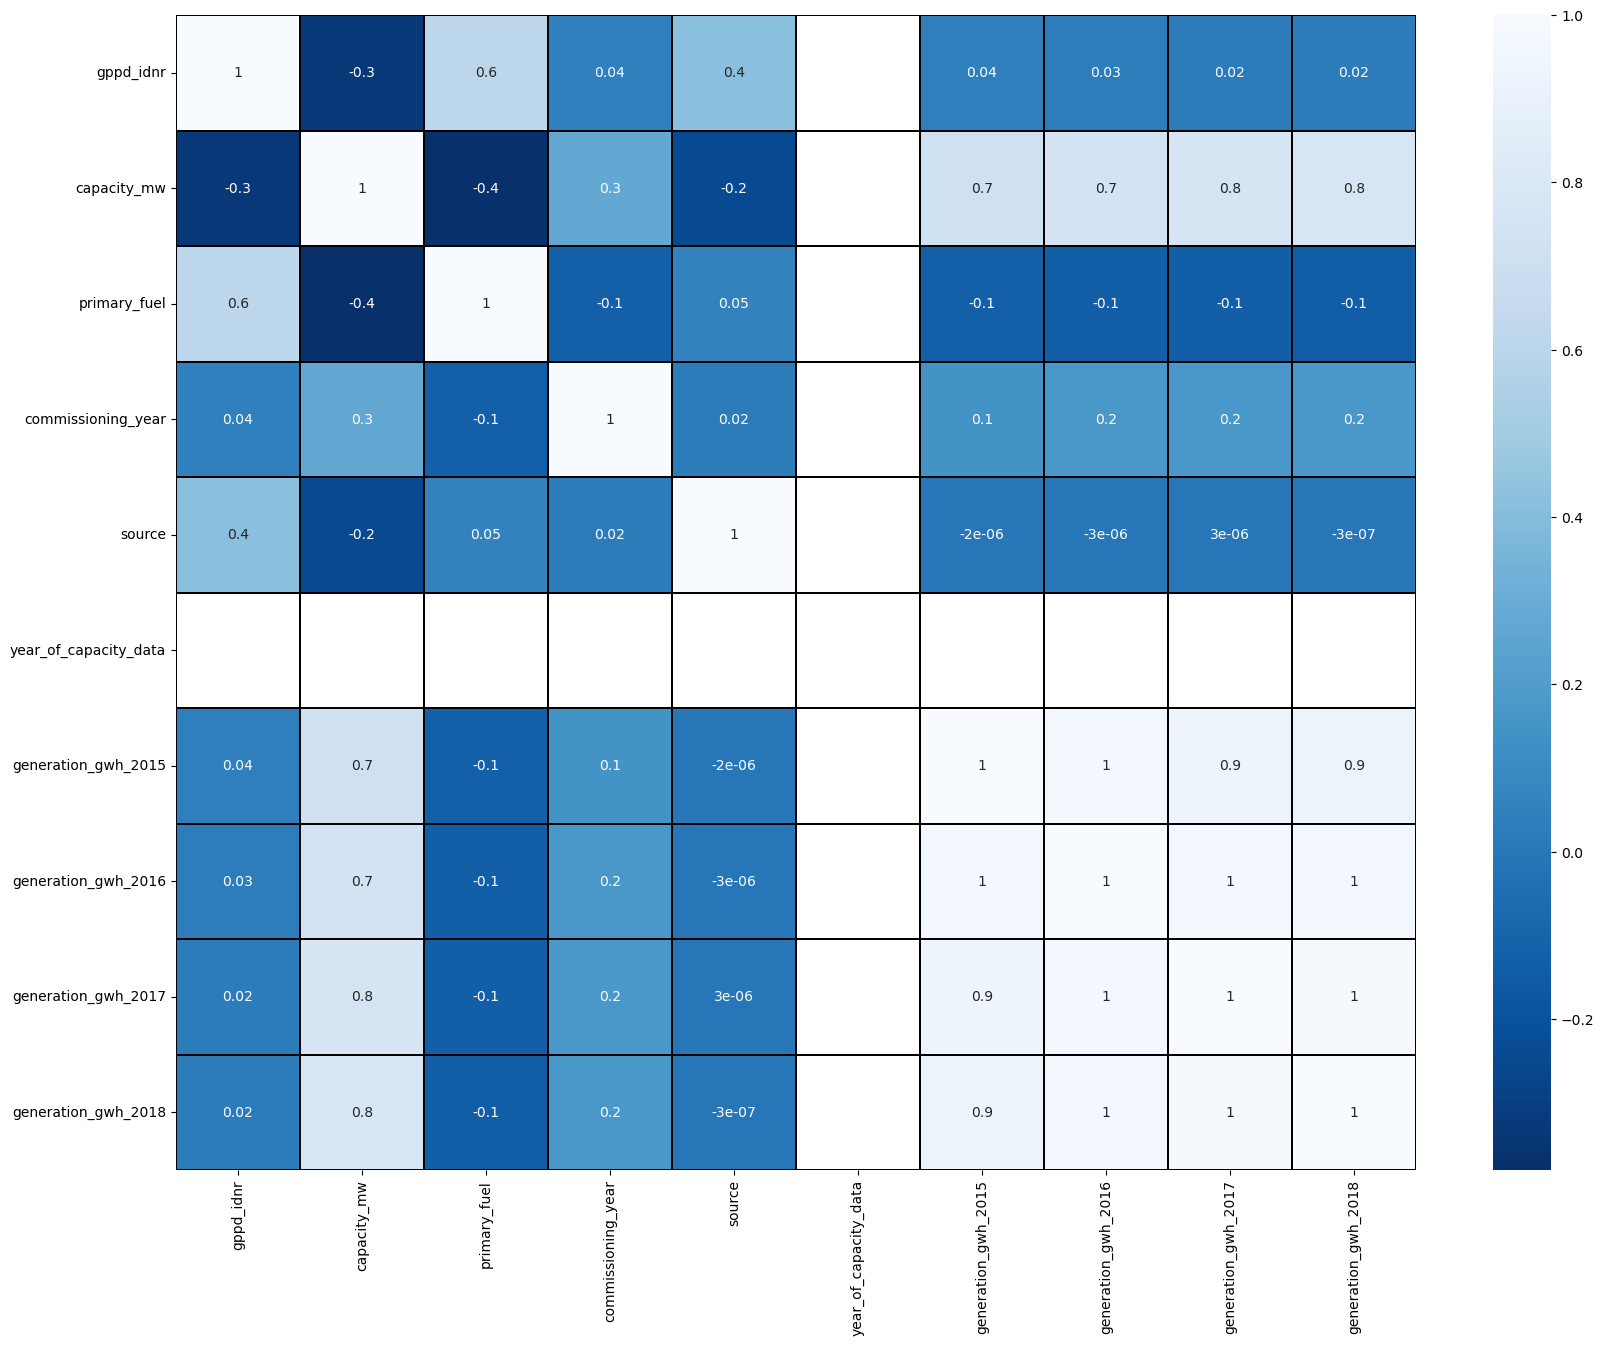

In [28]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), linewidths = 0.1, fmt = '.1g', linecolor = 'black', annot = True, cmap = 'Blues_r')
plt.yticks(rotation = 0);
plt.show()

In [30]:
# Checking the correlation between features and target 
cor = df.corr()
cor['capacity_mw'].sort_values(ascending=False)

capacity_mw              1.000000
generation_gwh_2018      0.773456
generation_gwh_2017      0.757582
generation_gwh_2016      0.742224
generation_gwh_2015      0.711192
commissioning_year       0.274153
source                  -0.242122
gppd_idnr               -0.335742
primary_fuel            -0.380395
year_of_capacity_data         NaN
Name: capacity_mw, dtype: float64

In [31]:
cor['primary_fuel'].sort_values(ascending=False)

primary_fuel             1.000000
gppd_idnr                0.609180
source                   0.053613
generation_gwh_2015     -0.124830
commissioning_year      -0.126488
generation_gwh_2016     -0.131054
generation_gwh_2017     -0.132000
generation_gwh_2018     -0.136983
capacity_mw             -0.380395
year_of_capacity_data         NaN
Name: primary_fuel, dtype: float64

In [32]:
# Separating features and label

x = df.drop('capacity_mw', axis = 1)
y = df['capacity_mw']
print(x.shape)
print(y.shape)

(907, 9)
(907,)


In [33]:
# Feature scaling using Standard Scalarization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [35]:
#importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [36]:
# finding the best Random State 
maxAccu = 0
maxRS = 0
for i in range(0,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state = i)
    lr=LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print('Maximul r2 score is ', maxAccu, ' on Random_state', maxRS)

Maximul r2 score is  0.8580991927876981  on Random_state 92


In [37]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = maxRS)

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge

In [39]:
LR = LinearRegression()
RFR = RandomForestRegressor()
DTR = DecisionTreeRegressor()
knn = KNN()
las = Lasso()
rdg = Ridge()

In [41]:
for model in [LR, RFR, DTR, knn, las, rdg]:
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    
    pred_train_df = r2_score(y_train, y_pred_train)
    pred_test_df = r2_score(y_test, y_pred_test)
    
    print(f"model: {model}\nTrain Accuracy: {pred_train_df}\nTest Accuracy: {pred_test_df}\n\n")

model: LinearRegression()
Train Accuracy: 0.6777455308558381
Test Accuracy: 0.8580991927876981


model: RandomForestRegressor()
Train Accuracy: 0.97267172993996
Test Accuracy: 0.8781600040874173


model: DecisionTreeRegressor()
Train Accuracy: 1.0
Test Accuracy: 0.8119154861002393


model: KNeighborsRegressor()
Train Accuracy: 0.8355744585265438
Test Accuracy: 0.8521596757562836


model: Lasso()
Train Accuracy: 0.6775961969873838
Test Accuracy: 0.8597447351845682


model: Ridge()
Train Accuracy: 0.6777209387153926
Test Accuracy: 0.8579684280943276




In [42]:
from sklearn.model_selection import GridSearchCV

param = {'n_estimators':[50, 100, 120], 
         'criterion':['squared_error', 'friedman_mse'],
        'max_features':['sqrt','log2'],
        'bootstrap':[False,True],
        'random_state':[10, 11, 100, 120]}

gscv = GridSearchCV(RandomForestRegressor(),param, cv=5)
gscv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [False, True],
                         'criterion': ['squared_error', 'friedman_mse'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100, 120],
                         'random_state': [10, 11, 100, 120]})

In [43]:
gscv.best_params_

{'bootstrap': True,
 'criterion': 'squared_error',
 'max_features': 'sqrt',
 'n_estimators': 50,
 'random_state': 11}

In [44]:
Model = RandomForestRegressor(n_estimators = 50, criterion = 'squared_error', max_features = 'sqrt', random_state= 11, bootstrap = True)

In [45]:
Model.fit(x_train, y_train)
pred=Model.predict(x_test)
print('R2_score:', r2_score(y_test,pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

R2_score: 0.8769846971322376
Mean Absolute Error: 120.29857040293041
Mean Squared Error: 65414.462745248995
Root Mean Squared Error: 255.76251239235393


In [46]:
import joblib
joblib.dump(Model, 'Global_Power_Plant_capacity_mw.pkl')

['Global_Power_Plant_capacity_mw.pkl']

In [47]:
# lets load the saved model and get the predictions
model = joblib.load('Global_Power_Plant_capacity_mw.pkl')

# prediction
prediction = model.predict(x_test)
prediction

array([1.8235400e+02, 3.7510000e+01, 5.8120000e+01, 6.2710000e+01,
       1.4024000e+03, 3.9787200e+02, 4.2210200e+02, 2.3644000e+01,
       1.0002800e+02, 2.4972000e+01, 4.5662000e+01, 1.7045360e+02,
       2.5308000e+03, 6.7527582e+02, 8.2764400e+02, 7.7340000e+02,
       1.5060000e+01, 4.9465100e+02, 2.9666000e+03, 1.1174000e+02,
       3.0676000e+01, 1.0063000e+02, 6.6079040e+02, 4.8400000e+00,
       1.2236000e+03, 4.2851400e+01, 2.8460200e+01, 4.5346000e+01,
       1.5654000e+01, 5.6500000e+01, 9.6360000e+00, 1.1772400e+02,
       1.5443000e+03, 1.3322240e+03, 1.8668000e+01, 2.5223000e+01,
       1.8285000e+01, 2.5040000e+01, 1.2387400e+02, 6.2278000e+01,
       6.6911000e+01, 1.9230800e+02, 2.4944000e+01, 1.1766000e+01,
       1.7830000e+01, 1.1510000e+01, 5.8842000e+02, 8.5943000e+01,
       3.0678000e+01, 1.6508000e+01, 1.6313730e+02, 2.4474142e+02,
       4.2028000e+01, 2.7632000e+03, 1.2904000e+03, 2.0014000e+01,
       4.6146000e+01, 1.5876000e+01, 1.8702800e+02, 3.3257740e

In [48]:
a = np.array(y_test) # this is to convert y_test intro array
df = pd.DataFrame({'Predicted':prediction,'Orignial':a})
df

,Predicted,Orignial
0,182.354,66.0
1,37.510,30.6
2,58.120,120.0
3,62.710,30.0
4,1402.400,1110.0
...,...,...
268,13.746,1.5
269,924.044,726.6
270,231.598,34.4
271,136.934,115.0


In [49]:
conclusion = pd.DataFrame([model.predict(x_test)[:]], index = ['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,263,264,265,266,267,268,269,270,271,272
Predicted,182.354,37.51,58.12,62.71,1402.4,397.872,422.102,23.644,100.028,24.972,...,69.22,640.9928,34.98,8.585,1389.2,13.746,924.044,231.598,136.934,7.915
Original,182.354,37.51,58.12,62.71,1402.4,397.872,422.102,23.644,100.028,24.972,...,69.22,640.9928,34.98,8.585,1389.2,13.746,924.044,231.598,136.934,7.915
